# **TikTok Project - EDA**

In [131]:
# Import packages
import numpy as np
import pandas as pd

# Import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for statistical analysis
import scipy.stats as stats

In [132]:
# Load dataset into dataframe
data = pd.read_csv("C:\\Users\\mukhe\\Desktop\\Data_Analytics\\Projects\\Datasets\\tiktok_dataset.csv")

## Exploratory Data Analysis

In [133]:
# Display and examine the first ten rows of the dataframe
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [134]:
# Get summary info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [135]:
# Get summary statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [136]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [137]:
# drop missing rows
data = data.dropna(axis=0).reset_index(drop=True)

In [138]:
# Check if it worked
data.isna().sum().sum()

0

In [139]:
# Check for duplicates
data.duplicated().sum()

0

1. The data represents the claim status and different statistics such as like count, download count, share count, view count and comment count for every video uploaded.

2. There are 12 rows and 19382 total records in which there are 298 null values for most of the columns. There are 3 int, 5 float and 4 object type columns.

3. While observing the basic statistics some of the records might have outliers as the max value is far greater than the quartile and standard deviations.

### Investigate the variables

In [140]:
# Obtain value counts for 'claim_status'
data['claim_status'].value_counts()

claim      9608
opinion    9476
Name: claim_status, dtype: int64

In [141]:
# Average view count of videos with "claim" status
data[data['claim_status']=='claim']['video_view_count'].mean()

501029.4527477102

In [142]:
# Average view count of videos with "opinion" status
data[data['claim_status']=='opinion']['video_view_count'].mean()

4956.43224989447

In [143]:
# Get counts for each group combination of claim status and author ban status
data.groupby(['claim_status','author_ban_status']).agg({'video_id':['count']})

video_id
                                  count
claim_status author_ban_status         
claim        active                6566
             banned                1439
             under review          1603
opinion      active                8817
             banned                 196
             under review           463

There are more banned authors with claim status than the opinion status.

In [144]:
# Group the data by 'author_ban_status' and computer count, mean and median for views, likes and shares
data.groupby('author_ban_status').agg({'video_view_count':['count','mean', 'median'],
                                      'video_like_count':['count','mean', 'median'],
                                      'video_share_count':['count','mean', 'median']}).round(2)

video_view_count                      video_like_count  \
                             count       mean    median            count   
author_ban_status                                                          
active                       15383  215927.04    8616.0            15383   
banned                        1635  445845.44  448201.0             1635   
under review                  2066  392204.84  365245.5             2066   

                                       video_share_count                     
                        mean    median             count      mean   median  
author_ban_status                                                            
active              71036.53    2222.0             15383  14111.47    437.0  
banned             153017.24  105573.0              1635  29998.94  14468.0  
under review       128718.05   71204.5              2066  25774.70   9444.0

Let's create three new columns to help better understand engagement rates:
* `likes_per_view`: represents the number of likes divided by the number of views for each video
* `comments_per_view`: represents the number of comments divided by the number of views for each video
* `shares_per_view`: represents the number of shares divided by the number of views for each video

In [145]:
# Create a likes_per_view column
data['likes_per_view'] = data['video_like_count']/data['video_view_count']

# Create a comments_per_view column
data['comments_per_view'] = data['video_comment_count']/data['video_view_count']

# Create a shares_per_view column
data['shares_per_view'] = data['video_share_count']/data['video_view_count']

In [146]:
# Compute the statistics for new columns
data.groupby(['claim_status', 'author_ban_status']).agg({'likes_per_view':['count', 'mean', 'median'],
                                                        'comments_per_view':['count', 'mean', 'median'],
                                                        'shares_per_view':['count', 'mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

From the above statistics, we could see that the video engaging rate is more for the claim status than the opinion status. And, in claim status, videos under banned author status got more user attention than active or under review. However, videos in opinion status which are under active and under view got more user engagement than that of the banned status.

## Data Visualization

Text(0.5, 1.0, 'Video Duration Boxplot')

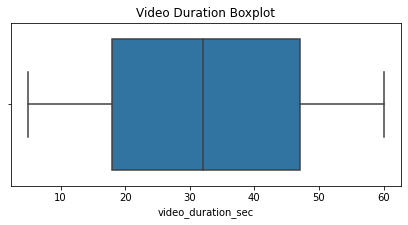

In [147]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(7,3))
sns.boxplot(x=data['video_duration_sec'])
plt.title('Video Duration Boxplot')

Text(0.5, 1.0, 'Video Duration Distribution')

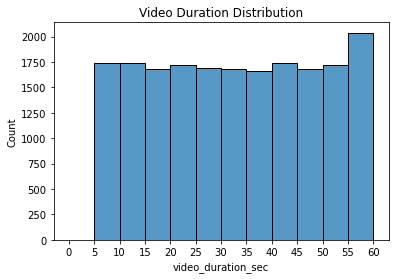

In [148]:
# Create a histogram
plt.figure(figsize=(6,4))
ax = sns.histplot(data=data, x='video_duration_sec', bins=range(0,61,5))
ax.set_xticks(range(0,61,5))
ax.set_xticklabels(range(0,61,5))
plt.title('Video Duration Distribution')

Text(0.5, 1.0, 'Video View Count Boxplot')

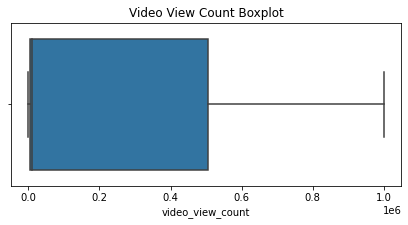

In [149]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(7,3))
sns.boxplot(x=data['video_view_count'])
plt.title('Video View Count Boxplot')

Text(0.5, 1.0, 'Video View Count Distribution')

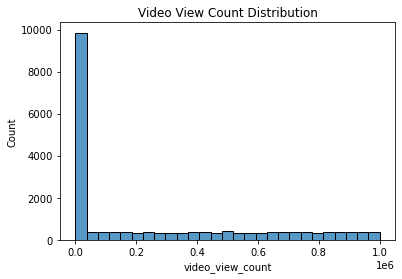

In [150]:
# Create a histogram
plt.figure(figsize=(6,4))
ax = sns.histplot(data=data, x='video_view_count')
plt.title('Video View Count Distribution')

The data consists of more videos that have less than 100000 views. The remaining videos have uniform distribution which are above 100000 views.

Text(0.5, 1.0, 'Video Like Count Box plot')

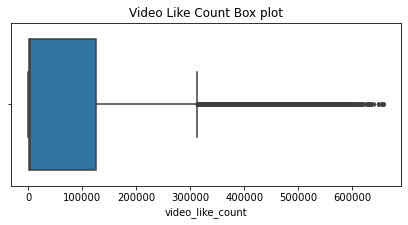

In [151]:
# Create a boxplot to `video_like_count`
plt.figure(figsize=(7,3))
sns.boxplot(x=data['video_like_count'], fliersize=3)
plt.title('Video Like Count Box plot')

Text(0.5, 1.0, 'Video Like Count Distribution')

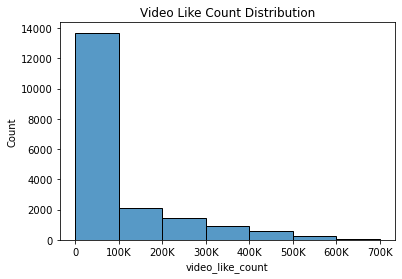

In [152]:
# Create a histogram
plt.figure(figsize=(6,4))
labels = [0] + [str(i) + 'K' for i in range(100, 701, 100)]
ax = sns.histplot(data=data,x='video_like_count', bins=range(0,7*(10**5)+1,10**5))
ax.set_xticks(range(0,7*(10**5)+1,10**5))
ax.set_xticklabels(labels)
plt.title('Video Like Count Distribution')

Data is unevenly distributed with more than 75% of the videos having less than 100K likes.

Text(0.5, 1.0, 'Video Comment Count Box plot')

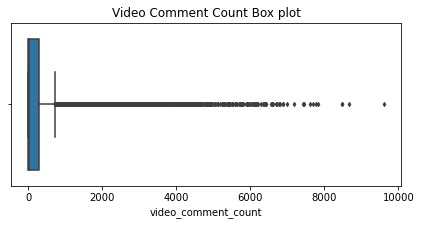

In [153]:
# Create a boxplot to visualize `video_comment_count`
plt.figure(figsize=(7,3))
sns.boxplot(x=data['video_comment_count'], fliersize=3)
plt.title('Video Comment Count Box plot')

Text(0.5, 1.0, 'Video Comment Count Distribution')

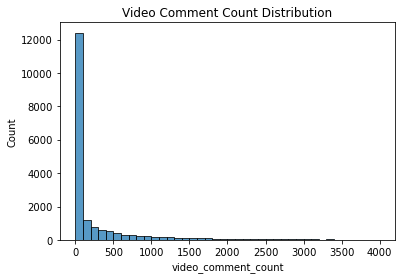

In [154]:
# Create a histogram
plt.figure(figsize=(6,4))
sns.histplot(data=data, x='video_comment_count', bins=range(0,4001,100))
plt.title('Video Comment Count Distribution')

Uneven data with 90% of the videos having < 100 comments.

Text(0.5, 1.0, 'Video Share Count Box plot')

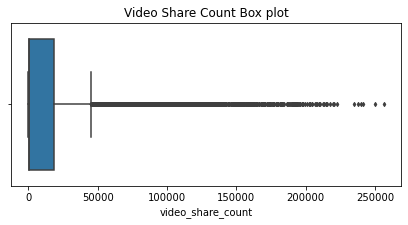

In [155]:
# Create a boxplot to visualize `video_share_count`
plt.figure(figsize=(7,3))
sns.boxplot(x=data['video_share_count'], fliersize=3)
plt.title('Video Share Count Box plot')

Text(0.5, 1.0, 'Video Share Count Distribution')

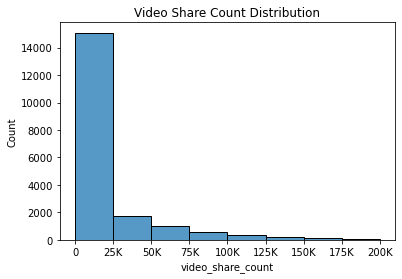

In [156]:
# Create a histogram
plt.figure(figsize=(6,4))
labels = [0] + [str(i) + 'K' for i in range(25,201,25)]
ax = sns.histplot(data=data, x='video_share_count', bins=range(0,2*(10**5)+1,25000))
ax.set_xticks(range(0,2*(10**5)+1,25000))
ax.set_xticklabels(labels)
plt.title('Video Share Count Distribution')

Same as the previous, the data is unevenly distributed with more than half the videos having <25000 shares.

Text(0.5, 1.0, 'Video Download Count Box plot')

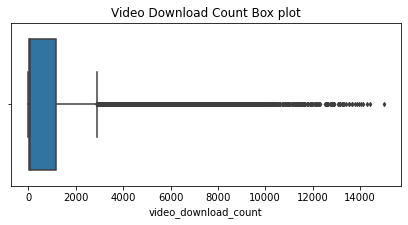

In [157]:
# Create a boxplot to visualize `video_download_count`
plt.figure(figsize=(7,3))
sns.boxplot(x=data['video_download_count'], fliersize=3)
plt.title('Video Download Count Box plot')

Text(0.5, 1.0, 'Video Share Count Distribution')

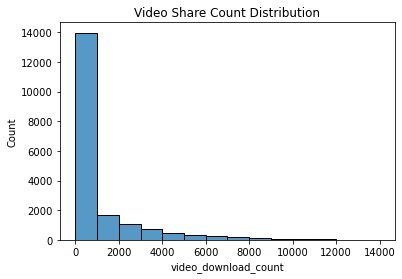

In [158]:
# Create a histogram
plt.figure(figsize=(6,4))
ax = sns.histplot(data=data, x='video_download_count', bins=range(0,14001,1000))
plt.title('Video Share Count Distribution')

Uneven distributed data with 75% videos having <1000 downloads.

Text(0.5, 1.0, 'Claim and Verified Histogram')

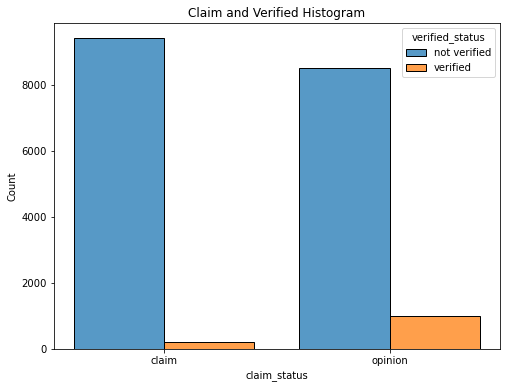

In [159]:
# Claim status by verified status
plt.figure(figsize=(8,6))
sns.histplot(data=data,
            x='claim_status',
            hue='verified_status',
            multiple='dodge',
            shrink=0.8)
plt.title('Claim and Verified Histogram')

There are more users that are not verified than the verified users.

Text(0.5, 1.0, 'Claim Status by Author Ban Status')

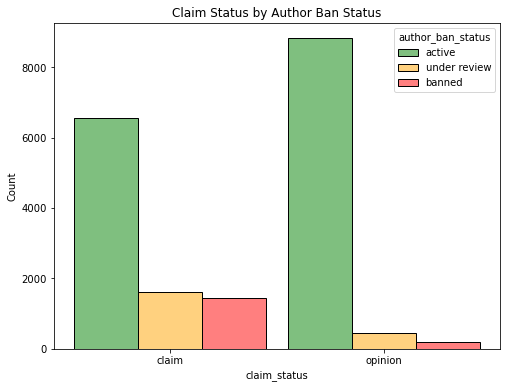

In [160]:
# Claim status by author_ban_status
plt.figure(figsize=(8,6))
sns.histplot(data=data, 
             x='claim_status',
             hue='author_ban_status',
             hue_order=['active','under review','banned'],
             palette={'active':'green','under review':'orange','banned':'red'},
             multiple='dodge',
             shrink = 0.9,
             alpha=0.5)
plt.title('Claim Status by Author Ban Status')

Active users are significantly higher for claims and opinions when compared to the banned authors. Among the active users, opinion has more than the claim status.

Text(0.5, 1.0, 'Median Video View Count by Author Ban Status')

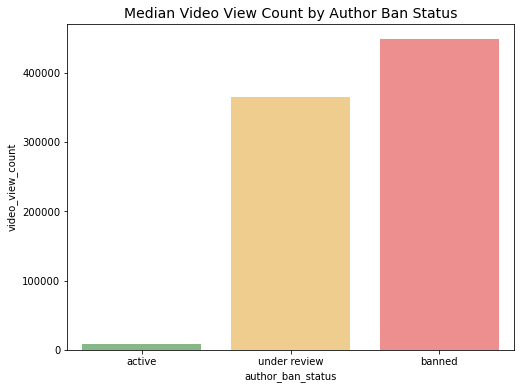

In [161]:
# Create a bar plot to visualize median view counts by author_ban_status
ban_status_median = data.groupby(['author_ban_status']).median(numeric_only=True).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=ban_status_median,
             x='author_ban_status',
             y='video_view_count',
             order=['active', 'under review','banned'],
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Median Video View Count by Author Ban Status', fontsize=14)

Median view counts is more of the non-active users than the active users. `video_view_count` could be a good indicator of the Claim status.

In [162]:
# Calculate the median view count for claim status.
data.groupby(['claim_status'])['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

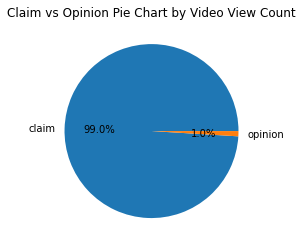

In [163]:
# Create a pie graph to visualize the proportions of total views for claim videos vs opinion videos
total_views = data.groupby(['claim_status'])['video_view_count'].sum()
plt.pie(total_views, labels=['claim', 'opinion'], autopct='%1.1f%%')
plt.title('Claim vs Opinion Pie Chart by Video View Count')
plt.show()

Claim status has 99% view count while opinion accounts to only 1%.

### Determine and Handle Outliers

In [164]:
# List of columns
columns = list(data.columns[7:12])
for column in columns:
    Q1 = data[column].quantile(0.25) # calculate 25% 
    Q3 = data[column].quantile(0.75) # calculate 75%
    IQR = Q3 - Q1 # interquartile range
    median = data[column].median() # median of the column
    outlier_threshold = median + 1.5*IQR # set oultier threshold
    count = (data[column] > outlier_threshold).sum() # calculate the total outliers
    print(f'Number of outliers in {column}: {count}')

Number of outliers in video_view_count: 2343
Number of outliers in video_like_count: 3468
Number of outliers in video_share_count: 3732
Number of outliers in video_download_count: 3733
Number of outliers in video_comment_count: 3882


Text(0.5, 1.0, 'Video View Count Vs Video Like Count Scatter Plot for claims')

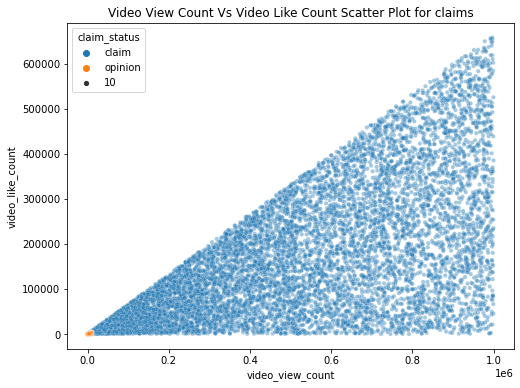

In [165]:
# Scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,
               x='video_view_count',
               y='video_like_count',
               hue='claim_status',
               size =10,
               alpha=0.4)
plt.title('Video View Count Vs Video Like Count Scatter Plot for claims')

The horizontal line at the top of the plot represents the outliers values replaced with the upper threshold.

Text(0.5, 1.0, 'Video View Count Vs Video Like Count for Opinions Only')

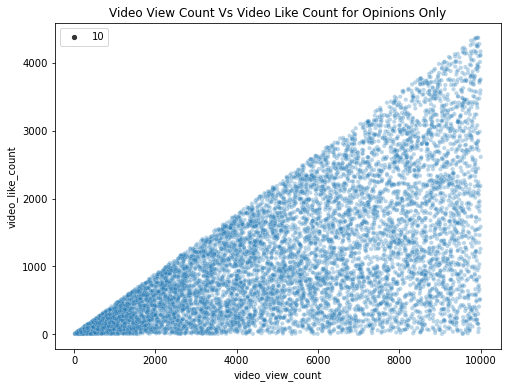

In [166]:
# Scatterplot of ``video_view_count` versus `video_like_count` for opinions only
mask = data[data['claim_status']=='opinion']
plt.figure(figsize=(8,6))
sns.scatterplot(data=mask,
               x='video_view_count',
               y='video_like_count',
               size=10,
               alpha=0.3)
plt.title('Video View Count Vs Video Like Count for Opinions Only')

## Hypothesis Testing

From the above EDA we could notice that `video_view_count` might serve as good indicator for claim status. Let's perform a hypothesis test if there is statistical significance in the `video_view_count` for verified and unverified accounts.

H<sub>0</sub> = There is no difference in number of views of videos posted by verified versus unverified accounts.

H<sub>a</sub> = There is difference in number of views of videos posted by verified versus unverified accounts.

In [167]:
# Conduct a two-sample t-test to compare means
verified = data[data['verified_status']=='verified']['video_view_count']
unverified = data[data['verified_status']=='not verified']['video_view_count']

tscore, pvalue = stats.ttest_ind(a=unverified, b=verified, equal_var=False)
print('t-score:',tscore)
print('p-value:',pvalue)

t-score: 25.499441780633777
p-value: 2.6088823687177823e-120


As per the calculation, we could see that p-value is very less and almost equal to zero which is less than the significance level. Therefore, we reject the null hypothesis and there is statistical significance of number of views posted by verified versus unverified accounts.